## Easy to understand Luigi pipeline

https://luigi.readthedocs.io/en/stable/ 

Luigi is a Python (2.7, 3.6, 3.7 tested) package that helps you build complex pipelines of batch jobs. It handles dependency resolution, workflow management, visualization, handling failures, command line integration, and much more.

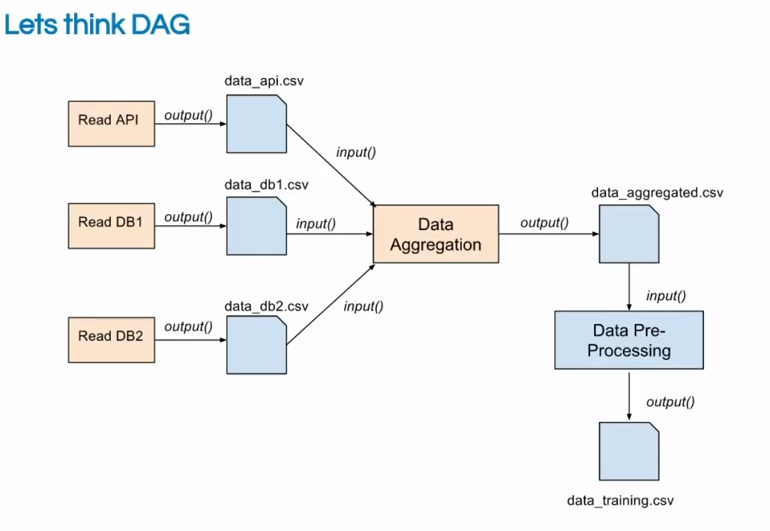

In [1]:
import luigi

class MyTask(luigi.Task):
    # Parameters for this task
    param = luigi.Parameter(default = 42)
    
    #What other task it depends on
    def requires(self):
        return SomeOtherTask(self.param)
    
    #Business logic of the task
    def run(self):
        f = self.output().open('w')
        print>>f, "hello world"
        f.close()
    
    #Where it writes output
    def output(self):
        return luigi.LocalTarget('/tmp/foo/bar-%s.txt' % self.param)
    
#if __name__ == "__main__":
#    luigi.run()

## "Luigify" our Data Preparation Tasks

In [2]:
import luigi
import pandas
import pickle as pkl
 
class APIDataIngestion(luigi.Task):
    
    def run(self):
        data_api_atring_io = get_data_from_api(input = API_URL)
        with self.output().open('w') as out_file:
            print >> out_file, data_api_string_io.get_value()
            
    def output(self):
        return luigi.LocalTarget("/tmp/data_api.csv")
    
class Database1Ingestion(luigi.Task):
    
    def run(self):
        data_db1_string_io = DataBase1.read()
        with self.output().open('w') as out_file:
            print >> out_file, data_db1_string_io.get_value()
            
    def output(self):
        return luigi.LocalTarget("/tmp/data_db1.csv")

class Database2Ingestion(luigi.Task):
    
    def run(self):
        data_db2_string_io = DataBase2.read()
        with self.output().open('w') as out_file:
            print >> out_file, data_db2_string_io.get_value()
    
    def output(self):
        return luigi.Localtarget("/tmp/data_db2.csv")
 
class DataAggregation(luigi.Task):
    
    def requires(self):
        yield APIDataIngestion()
        yield Database1Ingestion()
        yield Database2Ingestion()
        
    def run(self):
        df_api = pandas.read_csv(APIDataIngestion().output())
        df_db1 = pandas.read_csv(Database1Ingestion().output())
        df_db2 = pandas.read_csv(Database2Ingestion().ouput())
        df_aggregated = pandas.merge(pandas.merge(df_api, df_db1, on = "id"), df_db2, on = "id")
        df_aggregated.to_csv(self.output())
        
    def ouput(self):
        return luigi.LocalTarget("/tmp/data_aggregated.csv")

class DataPreProcessing(luigi.Task):
    
    def reguires(self):
        return DataAggregation()
    
    def run(self):
        with self.input().open('r') as in_file:
            df_preprocessed = DataPreProcessor.pre_process(df = in_file.read())
        with self.ouput().open('w') as out_file:
            df_preprocessed.to_csv(self.output())
    
    def output(self):
        return luigi.LocalTarget("/tmp/data_training.csv")

class Train(luigi.Task):
    
    def requires(self):
        return DataPreProcessing()
    
    def run(self):
        sales_model = train_random_forest(pandas.read_csv(DataPreProcessing().output().path))
        joblib.dump(sales_model, self.ouput().open('w'))
    
    def ouput(self):
        return luigi.LocalTarget("/tmp/rossman_sales_model.pkl")
                                          
#if __name__ == "__main__":
#    luigi.run()
    

### Check to see the status of your luigi pipeline with a web interface

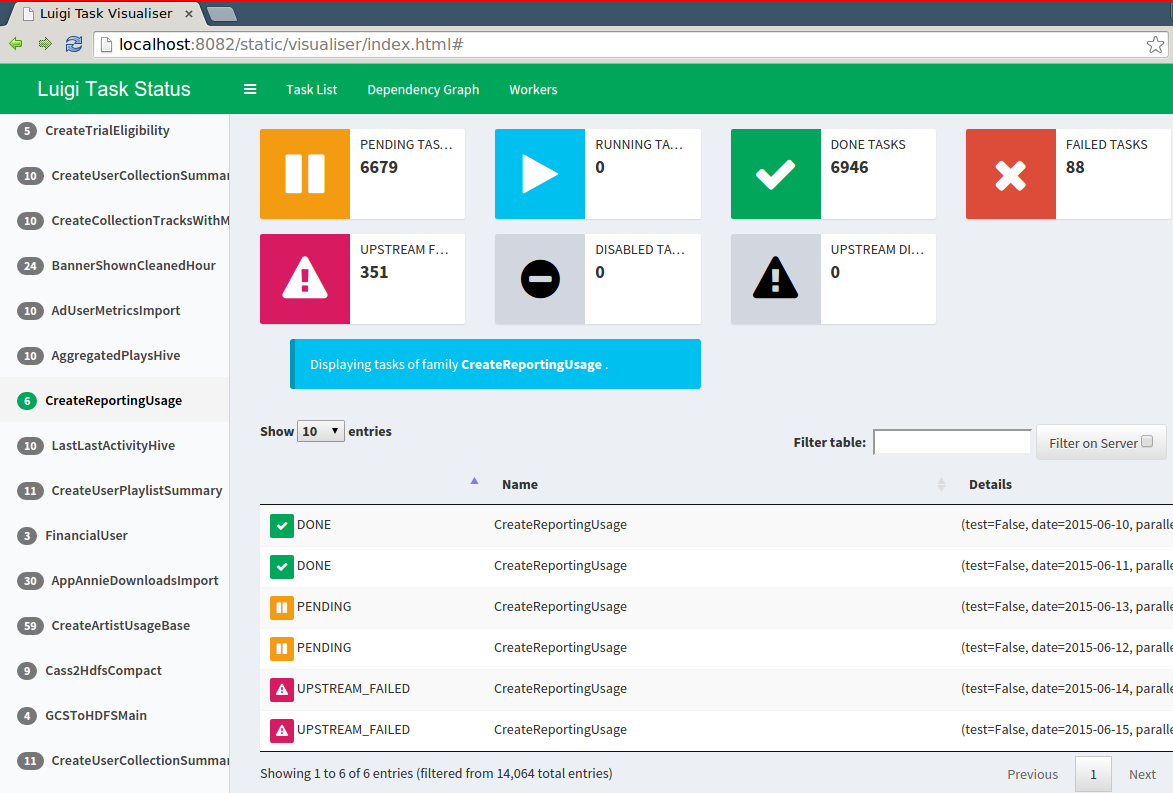

### Dependency graph example

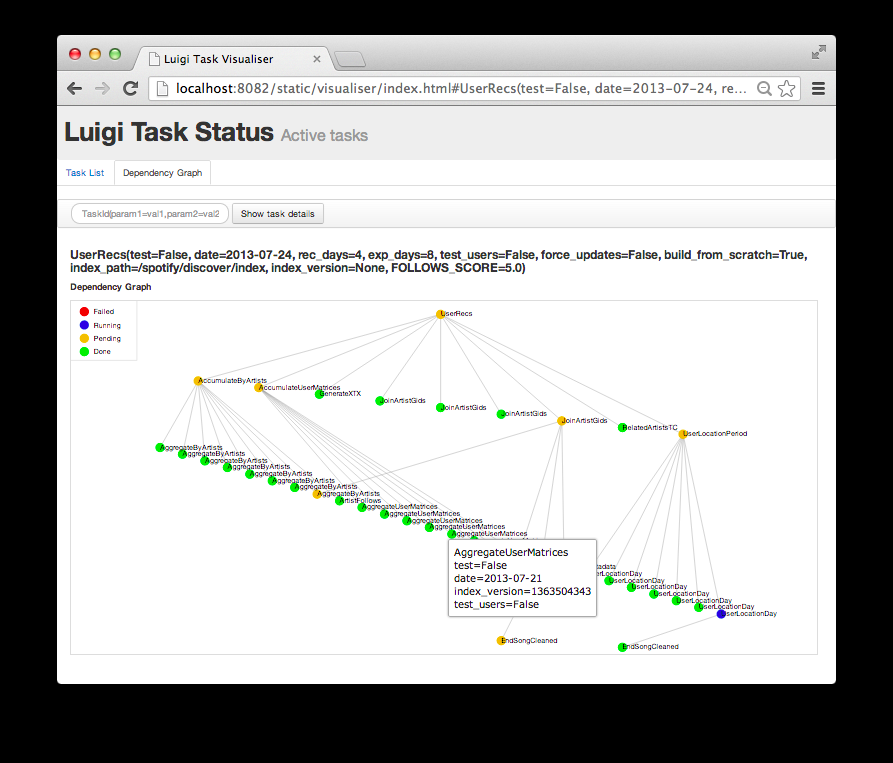

In [3]:
localhost:8082